In [120]:
import pandas as pd
import numpy as np
import missingno as msno

In [121]:
df = pd.read_csv("sdn_dataset.csv")

In [122]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [123]:
print("This dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

This dataset has 104345 rows and 23 columns.


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

# Data Preprocessing

### Distribution of Missing Values in the Dataset

<AxesSubplot: >

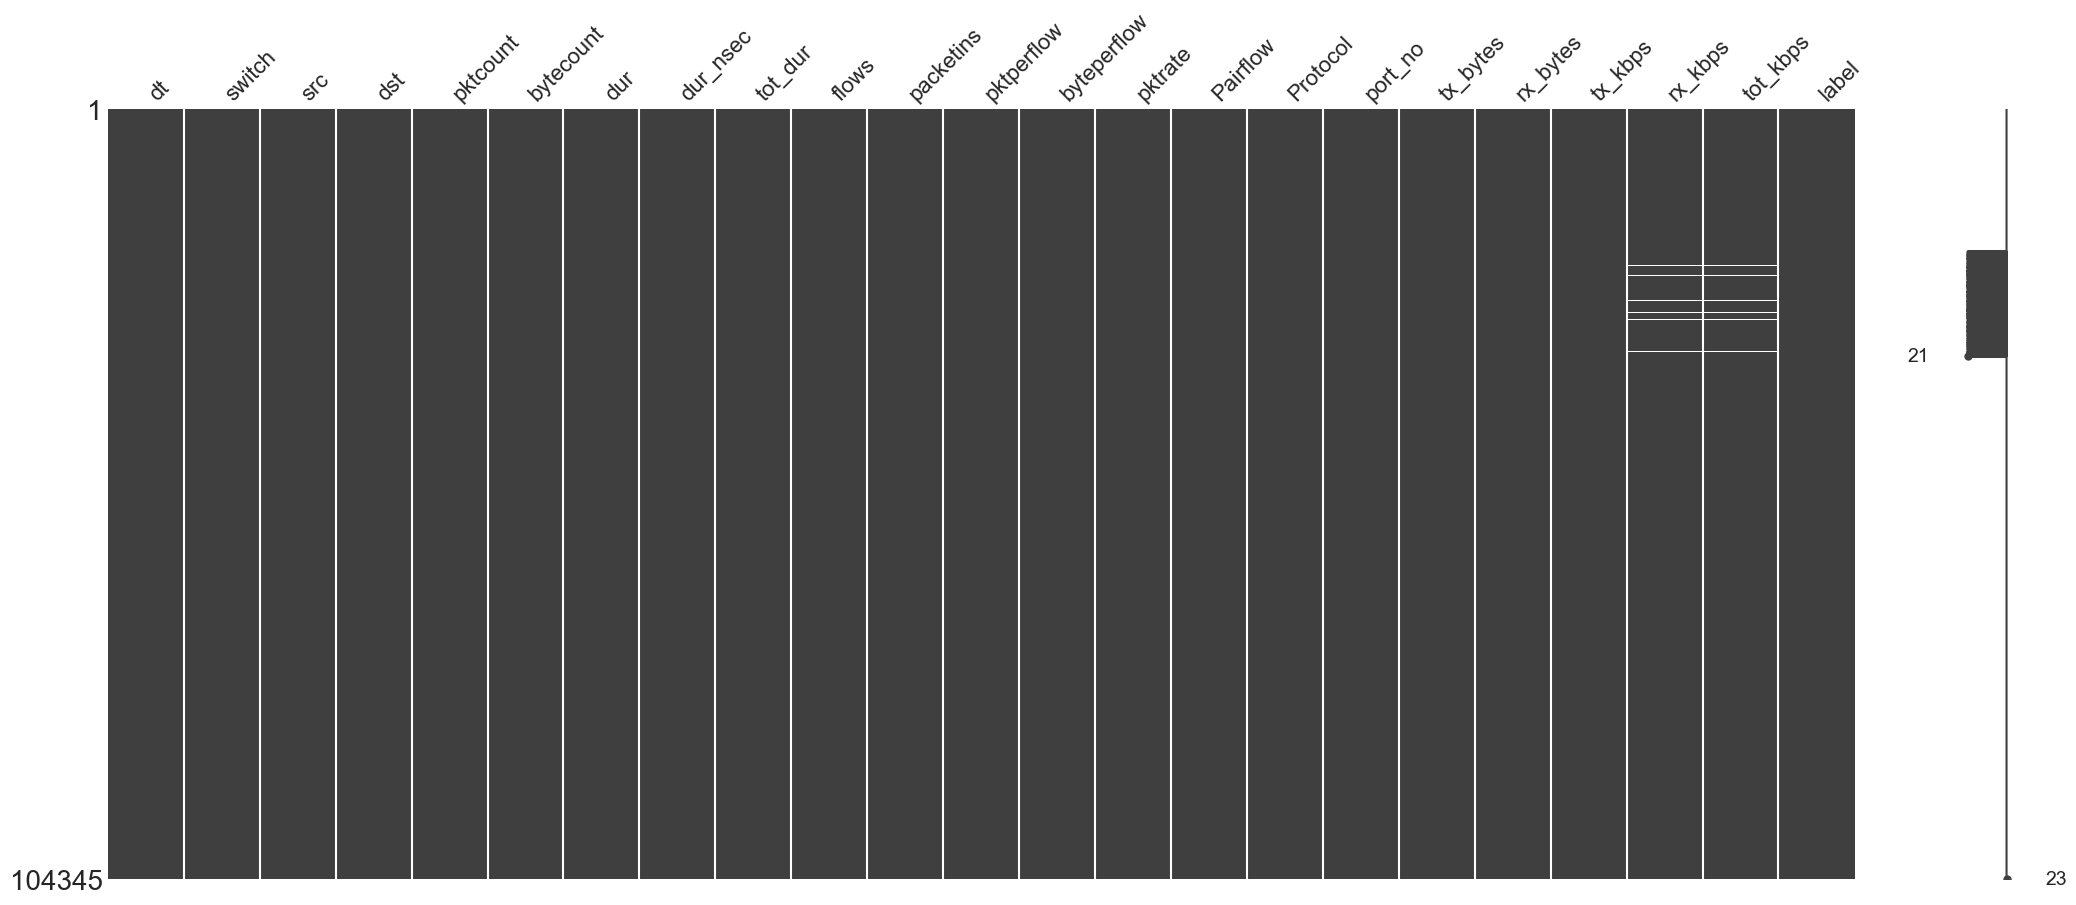

In [125]:
msno.matrix(df)

### Count of Null Values in Each Column

In [126]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

### Drop rows with null values

In [127]:
df.dropna(inplace = True)

In [128]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

### Dataframe after removing Null Values

In [129]:
print("This dataset has now " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns after dropping Null Values.")

This dataset has now 103839 rows and 23 columns after dropping Null Values.


## Features in the Dataset

### 1. Categorical Features

In [130]:
categorical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes == 'O')
]

print("Categorical features summary: \n")
print("Total number of Categorical features: ", len(categorical_features))
print("List of Categorical features:")
for i, feature in enumerate(categorical_features, 1):
    print(f"{i}. {feature}")

Categorical features summary: 

Total number of Categorical features:  3
List of Categorical features:
1. src
2. dst
3. Protocol


### 2. Numerical features

In [131]:
numerical_features = [
    feature for feature in df.columns
        if(df[feature].dtypes != 'O')
]

print("Numerical features summary: \n")
print("Total number of Numerical features: ", len(numerical_features))
print("List of Numerical features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i}. {feature}")

Numerical features summary: 

Total number of Numerical features:  20
List of Numerical features:
1. dt
2. switch
3. pktcount
4. bytecount
5. dur
6. dur_nsec
7. tot_dur
8. flows
9. packetins
10. pktperflow
11. byteperflow
12. pktrate
13. Pairflow
14. port_no
15. tx_bytes
16. rx_bytes
17. tx_kbps
18. rx_kbps
19. tot_kbps
20. label


Distinct Values in Numerical Features

In [132]:
df[numerical_features].nunique(axis = 0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### 2.1 Discrete Numerical Features

In [133]:
discrete_numerical_features = [
    feature for feature in numerical_features
        if(df[feature].nunique() <= 15 and feature != 'label')
]

print("Discrete numerical features summary: \n")
print("Total number of Discrete numerical features: ", len(discrete_numerical_features))
print("List of Discrete numerical features:")
for i, feature in enumerate(discrete_numerical_features, 1):
    print(f"{i}. {feature}")

Discrete numerical features summary: 

Total number of Discrete numerical features:  4
List of Discrete numerical features:
1. switch
2. flows
3. Pairflow
4. port_no


#### 2.2 Continuous Features

In [134]:
continuous_features = [
    feature for feature in numerical_features
        if( feature not in discrete_numerical_features + ['label'])
]

print("Continuous features summary: \n")
print("Total number of Continuous features: ", len(continuous_features))
print("List of Continuous features:")
for i, feature in enumerate(continuous_features, 1):
    print(f"{i}. {feature}")

Continuous features summary: 

Total number of Continuous features:  15
List of Continuous features:
1. dt
2. pktcount
3. bytecount
4. dur
5. dur_nsec
6. tot_dur
7. packetins
8. pktperflow
9. byteperflow
10. pktrate
11. tx_bytes
12. rx_bytes
13. tx_kbps
14. rx_kbps
15. tot_kbps


# Exploratory Data Analysis

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Functions

In [136]:
def countPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.countplot(y = col, data = df, palette = "Set2", hue = col, legend = "auto").set(title = "Distribution of "+ col)

In [137]:
def histoPlotDistribution(col):
    sns.set_theme(style = "darkgrid")
    sns.histplot(data = df, x = col, kde = True, color = "red").set(title = "Distribution of "+ col)

### Distribution of Categorical features

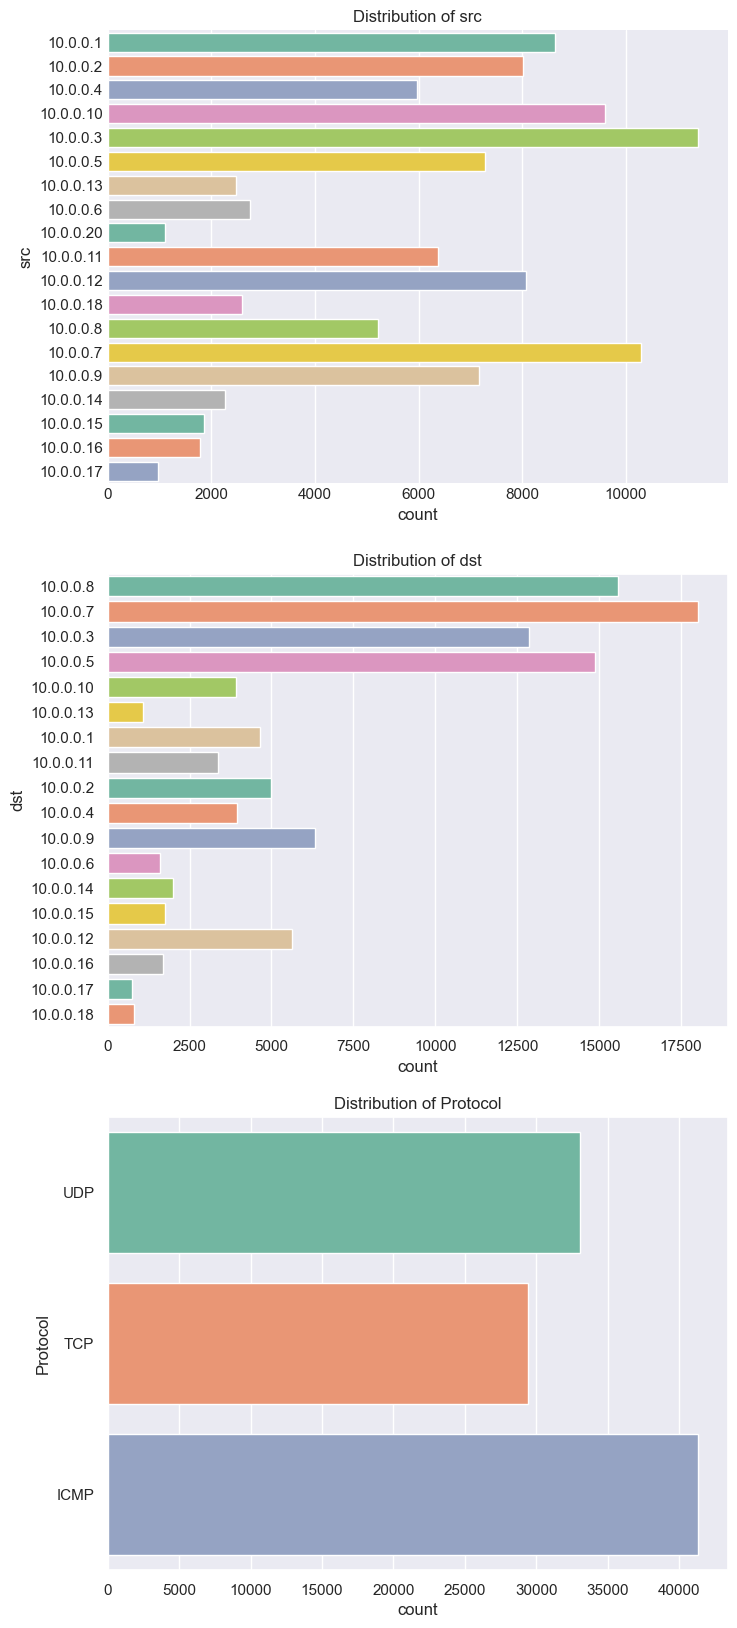

In [138]:
f = plt.figure(figsize = (8, 20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countPlotDistribution(categorical_features[i])
plt.show()

### Distribution of Discrete Numerical Features

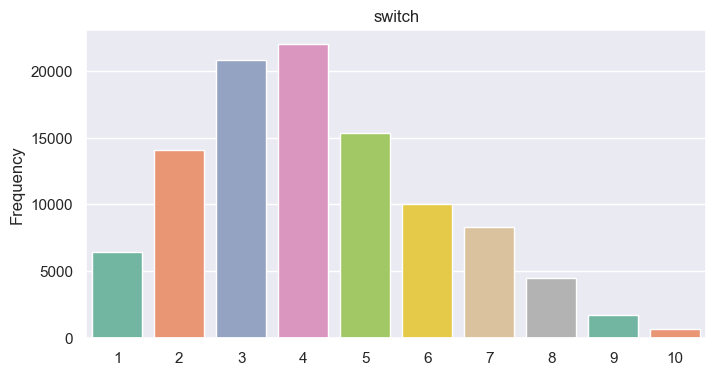

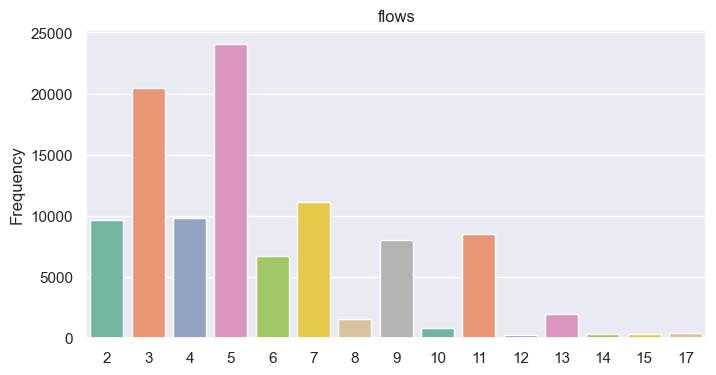

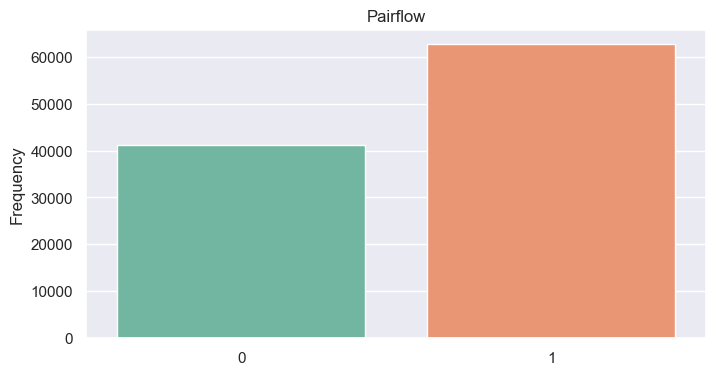

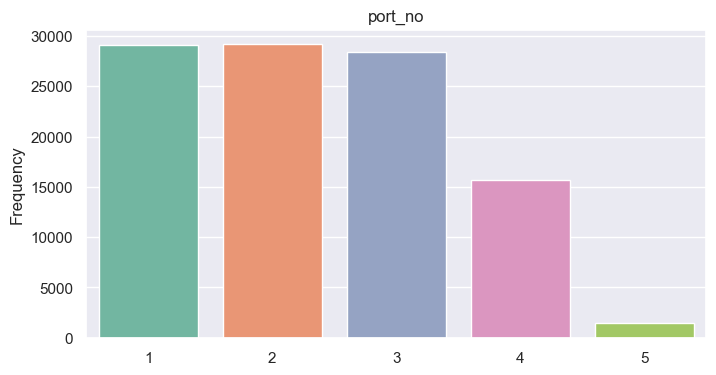

In [139]:
for feature in discrete_numerical_features:
    plt.figure(figsize = (8, 4))
    cat_num = df[feature].value_counts()
    sns.barplot(x = cat_num.index, y = cat_num, palette = "Set2", legend = False, hue = cat_num.index).set(title = feature, ylabel = "Frequency", xlabel = "")
    plt.show()

### Distribution of Continuous Features

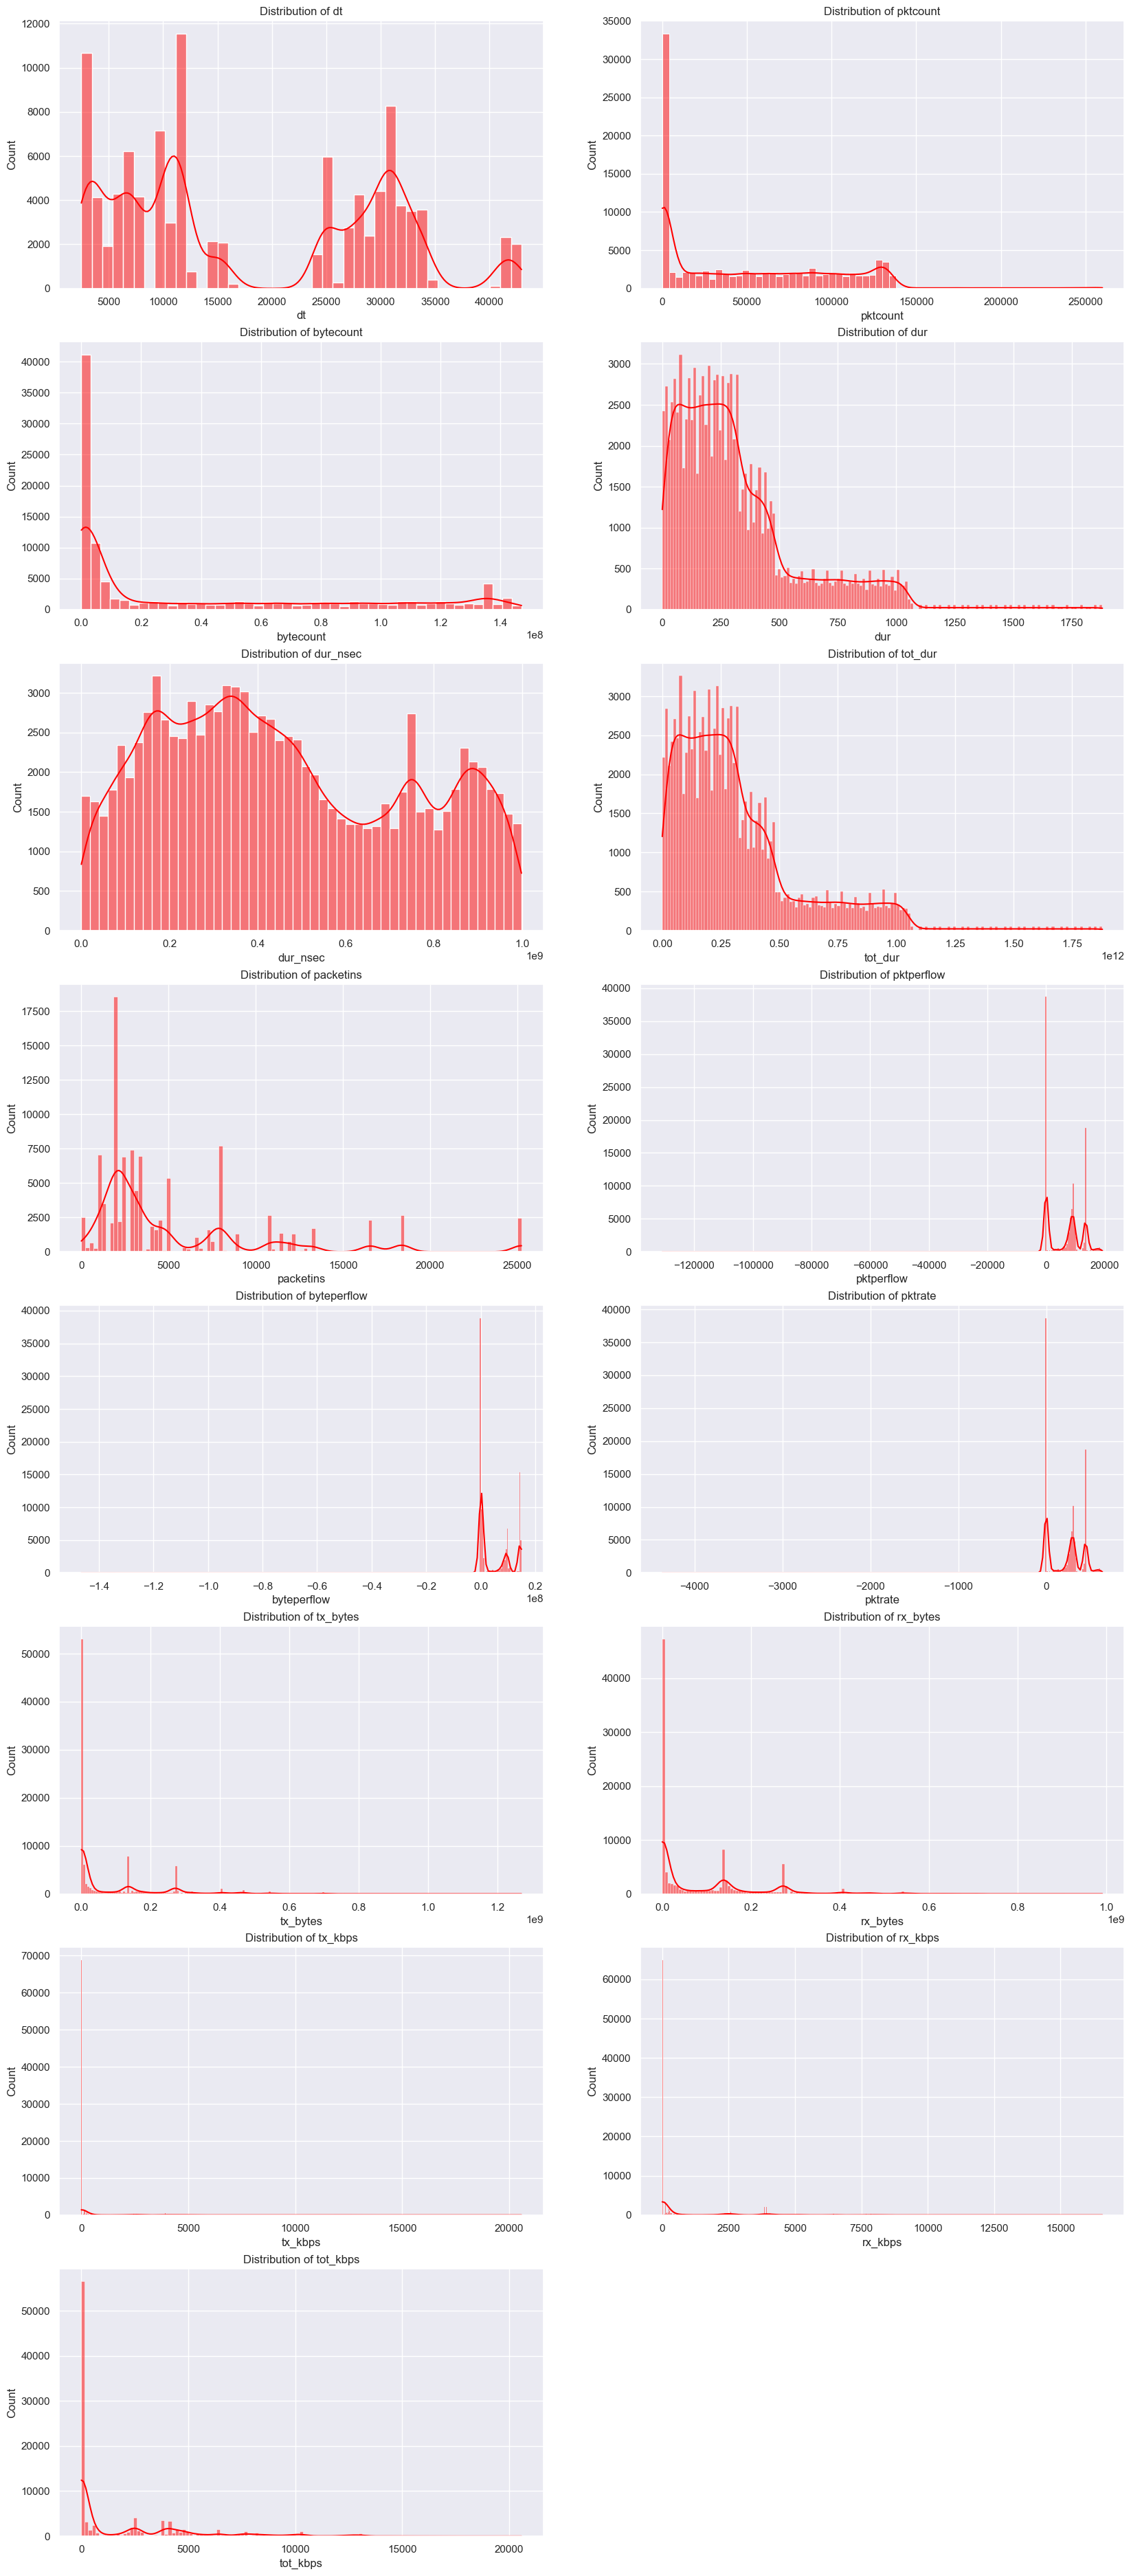

In [140]:
f = plt.figure(figsize = (20, 90))
for i in range(len(continuous_features)):
    f.add_subplot(len(continuous_features), 2, i+1)
    histoPlotDistribution(continuous_features[i])
plt.show()

### Frequency distribution of Label feature

In [141]:
benign = df[df['label'] == 0]
malign = df[df['label'] == 1]

benign_percentage = "{:.2f}".format((len(benign) / df.shape[0]) * 100)
malign_percentage = "{:.2f}".format((len(malign) / df.shape[0]) * 100)

print("Percentage of DDOS attack that has not occured: " + benign_percentage)
print("Percentage of DDOS attack that has occured: " + malign_percentage)


Percentage of DDOS attack that has not occured: 60.99
Percentage of DDOS attack that has occured: 39.01


### Distribution of Label Feature [Malign vs Benign]

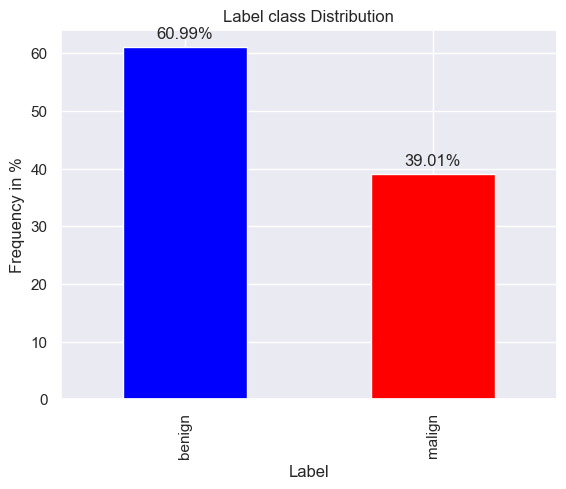

In [142]:
labels = ['benign', 'malign']
classes = pd.value_counts(df['label'], sort=True) / df['label'].count() * 100
ax = classes.plot(kind="bar", color=['blue', 'red'])
plt.title("Label class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency in %")
for i, v in enumerate(classes):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

In [143]:
def get_malign_protocols_percentage():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if (y == 1)]
    perc_arr = []
    for i in ['UDP', 'TCP', 'ICMP']:
        perc_arr.append(arr.count(i) / len(arr) * 100)
    return perc_arr

### Protocol distribution for Malign attacks

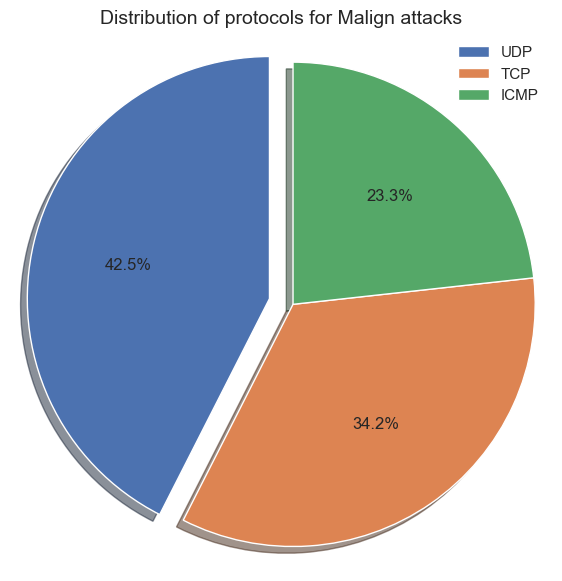

In [144]:
pie_fig, ax1 = plt.subplots(figsize = [7, 7])
ax1.pie(get_malign_protocols_percentage(), explode = (0.1, 0, 0), autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")
ax1.legend(['UDP', 'TCP', 'ICMP'], loc = "best")
plt.title("Distribution of protocols for Malign attacks", fontsize = 14)
plt.show()

### Corelation Matrix 

C:\Users\Pratham\AppData\Local\Temp\ipykernel_1732\3042199026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix = df.corr()
C:\Users\Pratham\AppData\Local\Temp\ipykernel_1732\3042199026.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corelation_matrix, dtype = np.bool)


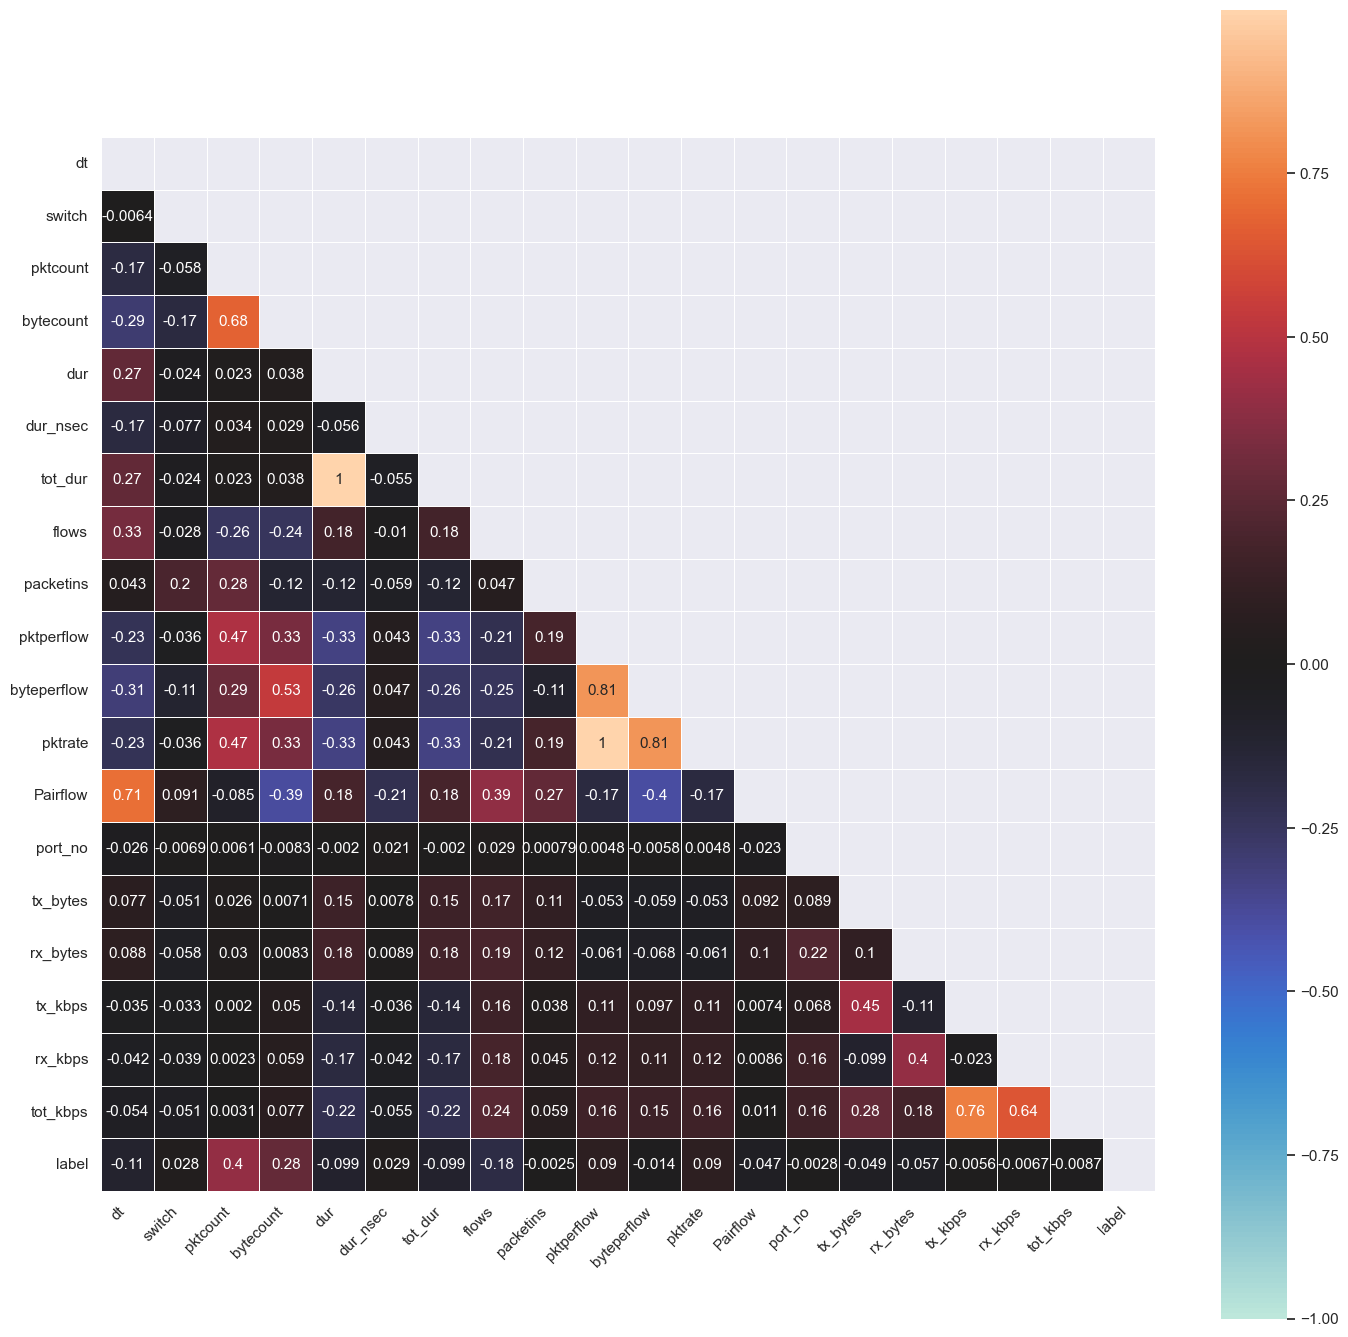

In [145]:
corelation_matrix = df.corr()
fig = plt.figure(figsize = (17, 17))
mask = np.zeros_like(corelation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_theme(style = "darkgrid")
ax = sns.heatmap(corelation_matrix, square = True, annot = True, center = 0, vmin = -1, linewidths = .5, annot_kws = {"size" : 11}, mask = mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

### Encoding Categorical Features

In [146]:
print("Features which need to be encoded are : \n", categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


In [147]:
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [148]:
print("After Encoding DataFrame has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

After Encoding DataFrame has 103839 rows and 57 columns.


In [149]:
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 57 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dt             103839 non-null  int64  
 1   switch         103839 non-null  int64  
 2   pktcount       103839 non-null  int64  
 3   bytecount      103839 non-null  int64  
 4   dur            103839 non-null  int64  
 5   dur_nsec       103839 non-null  int64  
 6   tot_dur        103839 non-null  float64
 7   flows          103839 non-null  int64  
 8   packetins      103839 non-null  int64  
 9   pktperflow     103839 non-null  int64  
 10  byteperflow    103839 non-null  int64  
 11  pktrate        103839 non-null  int64  
 12  Pairflow       103839 non-null  int64  
 13  port_no        103839 non-null  int64  
 14  tx_bytes       103839 non-null  int64  
 15  rx_bytes       103839 non-null  int64  
 16  tx_kbps        103839 non-null  int64  
 17  rx_kbps        103839 non-nul

# Training and Testing

### Splitting Dependant (Label) and Independant Variables

In [151]:
x = df.drop(['label'], axis = 1)
y = df['label']

In [152]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Scaling Features

In [153]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Training [80%] and Testing [20%] Split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape, x_test.shape)

(83071, 56) (20768, 56)


# Machine Learning Algorithms

In [155]:
accuracy_scores = []

In [156]:
print(accuracy_scores)

[]


In [157]:
import pickle

#### 1. K Nearest Neighbors

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [159]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
knn_precision = metrics.precision_score(y_test, y_pred)
knn_recall = metrics.recall_score(y_test, y_pred)
knn_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(knn_accuracy * 100)

print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"KNN Precision: {knn_precision * 100:.2f}%")
print(f"KNN Recall: {knn_recall * 100:.2f}%")
print(f"KNN F1 Score: {knn_f1Score * 100:.2f}%")


KNN Accuracy: 96.73%
KNN Precision: 96.86%
KNN Recall: 94.71%
KNN F1 Score: 95.77%


In [160]:
with open('models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

#### 2. Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = metrics.accuracy_score(y_test, y_pred)
lr_precision = metrics.precision_score(y_test, y_pred)
lr_recall = metrics.recall_score(y_test, y_pred)
lr_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(lr_accuracy * 100)

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Logistic Regression Precision: {lr_precision * 100:.2f}%")
print(f"Logistic Regression Recall: {lr_recall * 100:.2f}%")
print(f"Logistic Regression F1 Score: {lr_f1Score * 100:.2f}%")

Logistic Regression Accuracy: 83.71%
Logistic Regression Precision: 82.12%
Logistic Regression Recall: 74.66%
Logistic Regression F1 Score: 78.21%


In [163]:
with open('models/lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

#### 3. Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
dt_precision = metrics.precision_score(y_test, y_pred)
dt_recall = metrics.recall_score(y_test, y_pred)
dt_f1Score = metrics.f1_score(y_test, y_pred)
accuracy_scores.append(dt_accuracy * 100)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Decision Tree Precision: {dt_precision * 100:.2f}%")
print(f"Decision Tree Recall: {dt_recall * 100:.2f}%")
print(f"Decision Tree F1 Score: {dt_f1Score * 100:.2f}%")

Decision Tree Accuracy: 96.42%
Decision Tree Precision: 94.43%
Decision Tree Recall: 96.55%
Decision Tree F1 Score: 95.48%


In [166]:
with open('models/dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

#### 4. Support Vector Machine

In [167]:
from sklearn.svm import SVC

In [168]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
svm_precision = metrics.precision_score(y_test, y_pred)
svm_recall = metrics.recall_score(y_test, y_pred)
svm_f1Score = metrics.f1_score(y_test, y_pred)

accuracy_scores.append(svm_accuracy * 100)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Support Vector Machine Precision: {svm_precision * 100:.2f}%")
print(f"Support Vector Machine Recall: {svm_recall * 100:.2f}%")
print(f"Support Vector Machine F1 Score: {svm_f1Score * 100:.2f}%")

Support Vector Machine Accuracy: 97.54%
Support Vector Machine Precision: 96.78%
Support Vector Machine Recall: 96.94%
Support Vector Machine F1 Score: 96.86%


In [169]:
with open('models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

# Deep Neural Network

In [170]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [171]:
model = keras.Sequential()
model.add(Dense(28, input_shape = (56, ), activation = "relu", name = "Hidden_Layer_1"))
model.add(Dense(10, activation = "relu", name = "Hidden_Layer_2"))
model.add(Dense(1, activation = "sigmoid", name = "Output_Layer"))
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train Neural Network

In [172]:
dnn_model = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 50,
    verbose = 2,
    callbacks = None,
    validation_data = (x_test, y_test),
    shuffle = True,
    class_weight = None,
    sample_weight = None,
    initial_epoch = 0
)

Epoch 1/50
2596/2596 - 8s - loss: 0.1437 - accuracy: 0.9402 - val_loss: 0.0811 - val_accuracy: 0.9649 - 8s/epoch - 3ms/step
Epoch 2/50
2596/2596 - 5s - loss: 0.0748 - accuracy: 0.9697 - val_loss: 0.0664 - val_accuracy: 0.9711 - 5s/epoch - 2ms/step
Epoch 3/50
2596/2596 - 5s - loss: 0.0622 - accuracy: 0.9752 - val_loss: 0.0592 - val_accuracy: 0.9786 - 5s/epoch - 2ms/step
Epoch 4/50
2596/2596 - 5s - loss: 0.0536 - accuracy: 0.9787 - val_loss: 0.0510 - val_accuracy: 0.9803 - 5s/epoch - 2ms/step
Epoch 5/50
2596/2596 - 6s - loss: 0.0487 - accuracy: 0.9804 - val_loss: 0.0401 - val_accuracy: 0.9834 - 6s/epoch - 2ms/step
Epoch 6/50
2596/2596 - 6s - loss: 0.0452 - accuracy: 0.9817 - val_loss: 0.0651 - val_accuracy: 0.9728 - 6s/epoch - 2ms/step
Epoch 7/50
2596/2596 - 6s - loss: 0.0427 - accuracy: 0.9824 - val_loss: 0.0445 - val_accuracy: 0.9846 - 6s/epoch - 2ms/step
Epoch 8/50
2596/2596 - 8s - loss: 0.0404 - accuracy: 0.9838 - val_loss: 0.0382 - val_accuracy: 0.9849 - 8s/epoch - 3ms/step
Epoch 9/

### Accuracy and Loss for DNN Model

In [173]:
dnn_loss, dnn_accuracy = model.evaluate(x_test, y_test)
print(f"Deep Neural Network Accuracy: {dnn_accuracy * 100:.2f}%")

649/649 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9907
Deep Neural Network Accuracy: 99.07%


Saving the Model

In [174]:
model.save("models/DNN_model.keras")

In [175]:
accuracy_scores.append(dnn_accuracy * 100)

### Accuracy and Loss graph for initial DNN Model

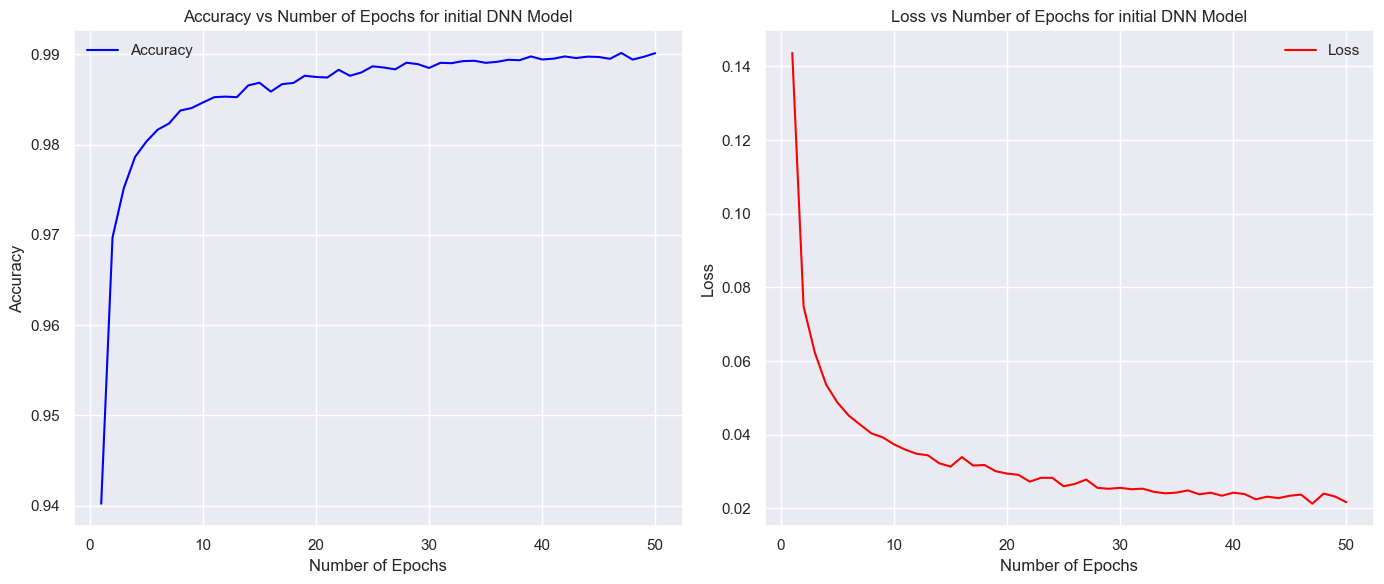

In [178]:
epochs = 50  

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

accuracy = dnn_model.history['accuracy'][:epochs] 
epochs_acc = range(1, epochs + 1)

plt.plot(epochs_acc, accuracy, color="blue", label="Accuracy")
plt.title("Accuracy vs Number of Epochs for initial DNN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)

loss = dnn_model.history['loss'][:epochs]  
epochs_loss = range(1, epochs + 1)

plt.plot(epochs_loss, loss, color="red", label="Loss")
plt.title("Loss vs Number of Epochs for initial DNN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

In [179]:
print(accuracy_scores)

[96.72573189522342, 83.71051617873651, 96.4175654853621, 97.53948382126349, 99.0658700466156]


# Model Accuracies Comparison

C:\Users\Pratham\AppData\Local\Temp\ipykernel_1732\3231045228.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


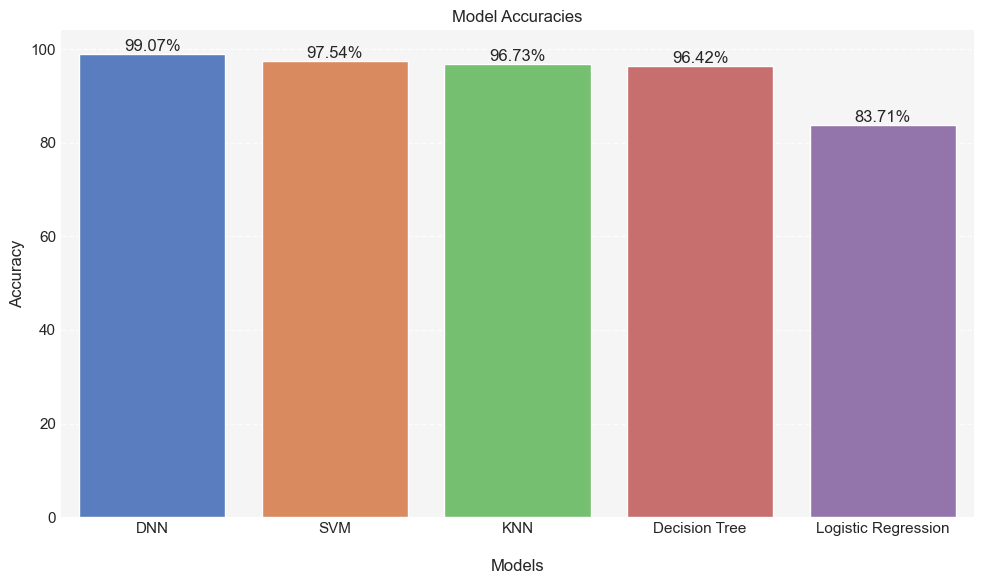

In [180]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'DNN']
model_names.reverse()
accuracy_scores.sort(reverse = True)
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))

sns.barplot(x=model_names, y=accuracy_scores, palette="muted", hue=model_names)

plt.legend(loc='upper right')

for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title("Model Accuracies")
plt.xlabel("\nModels")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [181]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(Dense(28, input_shape=(56,), activation="relu", name="Hidden_Layer_1"))
    model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
    model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    opt = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [182]:
from keras_tuner.tuners import RandomSearch

In [183]:
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

In [184]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [185]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test,y_test), batch_size = 32)

Trial 3 Complete [00h 12m 36s]
val_accuracy: 0.9916217029094696

Best val_accuracy So Far: 0.9929699301719666
Total elapsed time: 00h 40m 51s


In [186]:
tuner.results_summary()

Results summary
Results in ddos\ddos_isa
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9929699301719666

Trial 2 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9916217029094696

Trial 0 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9830508530139923


##### Best Hyperparameters

In [187]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.01}

##### Model Evaluation

In [188]:
loss, accuracy = modified_model.evaluate(x_test, y_test)

649/649 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9930


##### Best Epoch value

In [189]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(x_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/50
2596/2596 [==============================] - 9s 3ms/step - loss: 0.1500 - accuracy: 0.9369 - val_loss: 0.1265 - val_accuracy: 0.9477
Epoch 2/50
2596/2596 [==============================] - 8s 3ms/step - loss: 0.0797 - accuracy: 0.9688 - val_loss: 0.0734 - val_accuracy: 0.9690
Epoch 3/50
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0673 - accuracy: 0.9734 - val_loss: 0.0592 - val_accuracy: 0.9753
Epoch 4/50
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0597 - accuracy: 0.9765 - val_loss: 0.0639 - val_accuracy: 0.9767
Epoch 5/50
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0553 - accuracy: 0.9782 - val_loss: 0.0854 - val_accuracy: 0.9693
Epoch 6/50
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0527 - accuracy: 0.9788 - val_loss: 0.0435 - val_accuracy: 0.9839
Epoch 7/50
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0484 - accuracy: 0.9804 - val_loss: 0.0450 - val_accuracy:

### Accuracy and Loss graph for DNN Hypermodel

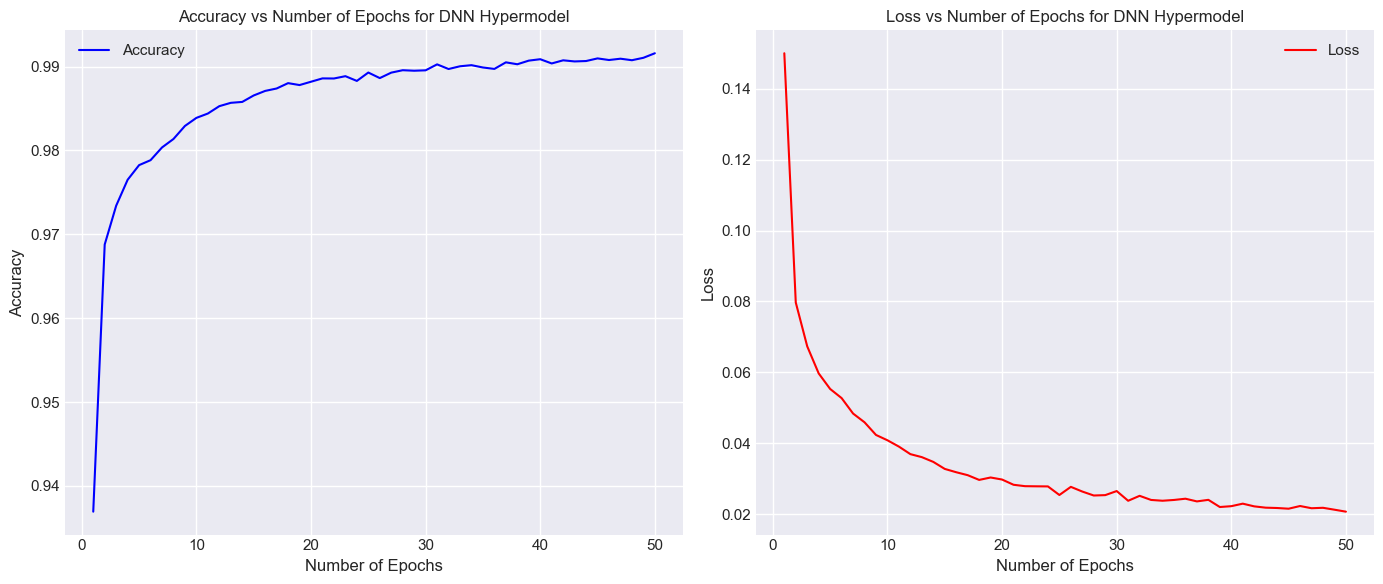

In [190]:
epochs = 50  

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

accuracy = history.history['accuracy'][:epochs] 
epochs_acc = range(1, epochs + 1)

plt.plot(epochs_acc, accuracy, color="blue", label="Accuracy")
plt.title("Accuracy vs Number of Epochs for DNN Hypermodel")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)

loss = history.history['loss'][:epochs]  
epochs_loss = range(1, epochs + 1)

plt.plot(epochs_loss, loss, color="red", label="Loss")
plt.title("Loss vs Number of Epochs for DNN Hypermodel")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

# Final Model

In [191]:
hypermodel = tuner.hypermodel.build(modified_hparam)

In [192]:
hypermodel.fit(x_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(x_test, y_test), initial_epoch=0)

Epoch 1/48
2596/2596 [==============================] - 8s 3ms/step - loss: 0.1537 - accuracy: 0.9363 - val_loss: 0.0883 - val_accuracy: 0.9667
Epoch 2/48
2596/2596 [==============================] - 6s 2ms/step - loss: 0.0805 - accuracy: 0.9691 - val_loss: 0.0624 - val_accuracy: 0.9774
Epoch 3/48
2596/2596 [==============================] - 6s 2ms/step - loss: 0.0642 - accuracy: 0.9744 - val_loss: 0.0691 - val_accuracy: 0.9741
Epoch 4/48
2596/2596 [==============================] - 7s 3ms/step - loss: 0.0572 - accuracy: 0.9767 - val_loss: 0.0500 - val_accuracy: 0.9806
Epoch 5/48
2596/2596 [==============================] - 8s 3ms/step - loss: 0.0526 - accuracy: 0.9785 - val_loss: 0.0536 - val_accuracy: 0.9757
Epoch 6/48
2596/2596 [==============================] - 9s 3ms/step - loss: 0.0486 - accuracy: 0.9803 - val_loss: 0.0420 - val_accuracy: 0.9823
Epoch 7/48
2596/2596 [==============================] - 8s 3ms/step - loss: 0.0448 - accuracy: 0.9822 - val_loss: 0.0406 - val_accuracy:

In [193]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Final Accuracy and Loss Values for HyperModel

In [194]:
result_final = hypermodel.evaluate(x_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

649/649 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9901
[Loss, Accuracy]: [0.020769905298948288, 0.9901290535926819]


### Making Sample Predictions

In [195]:
classes = model.predict(x_test)
print(classes)

649/649 [==============================] - 1s 2ms/step
[[0.0000000e+00]
 [1.4104193e-08]
 [1.0000000e+00]
 ...
 [1.9197549e-10]
 [0.0000000e+00]
 [3.1021896e-03]]


In [196]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [197]:
y_pred[:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [198]:
y_test[:20]

C:\Users\Pratham\AppData\Local\Temp\ipykernel_1732\2616895430.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:20]


48024    0
29120    0
6588     1
54867    0
52668    0
5810     0
39078    0
16076    0
12233    0
22321    1
36610    1
70721    1
25157    0
74175    0
42964    0
59130    0
58145    0
75624    1
82488    0
6287     0
Name: label, dtype: int64

In [199]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report of DNN

In [200]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99     12634
      malign       0.99      0.99      0.99      8134

    accuracy                           0.99     20768
   macro avg       0.99      0.99      0.99     20768
weighted avg       0.99      0.99      0.99     20768



### Confusion Matrix for DNN

In [201]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

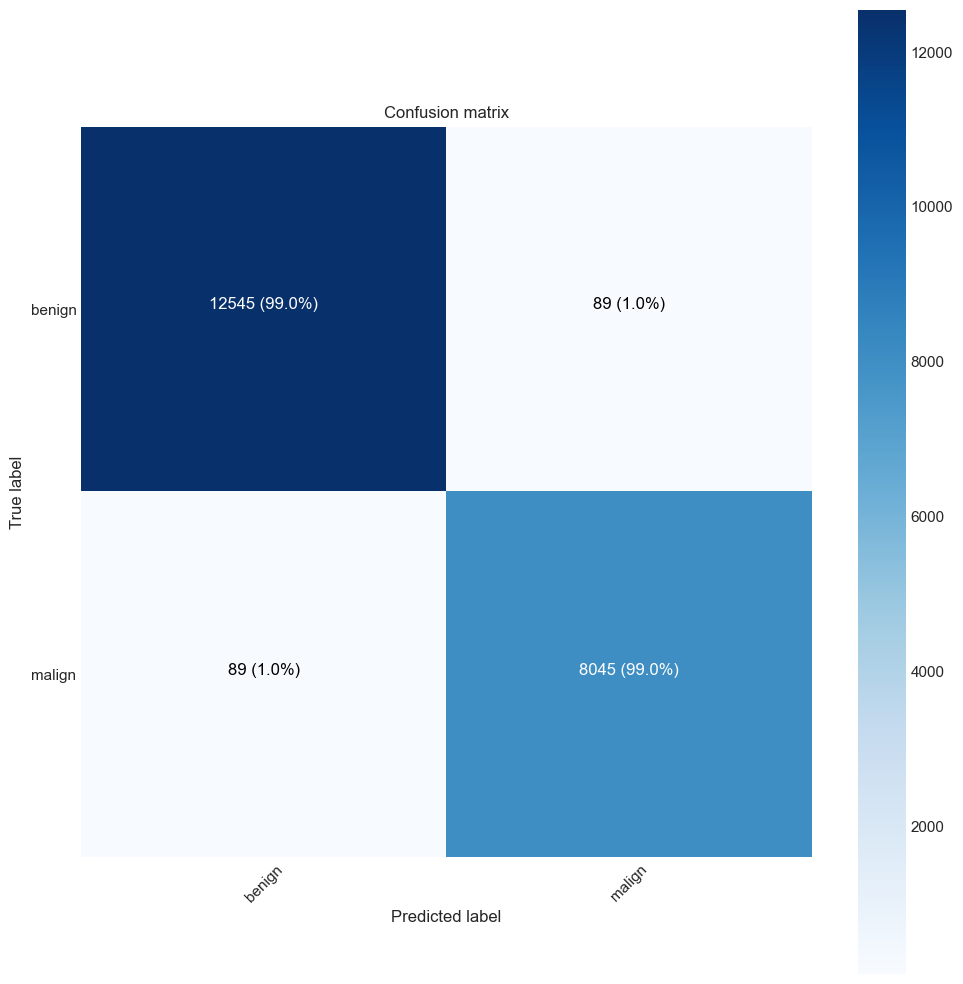

In [202]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

### ROC AUC Curve

In [203]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

Area under the curve(AUC) is: 0.9997586823274658


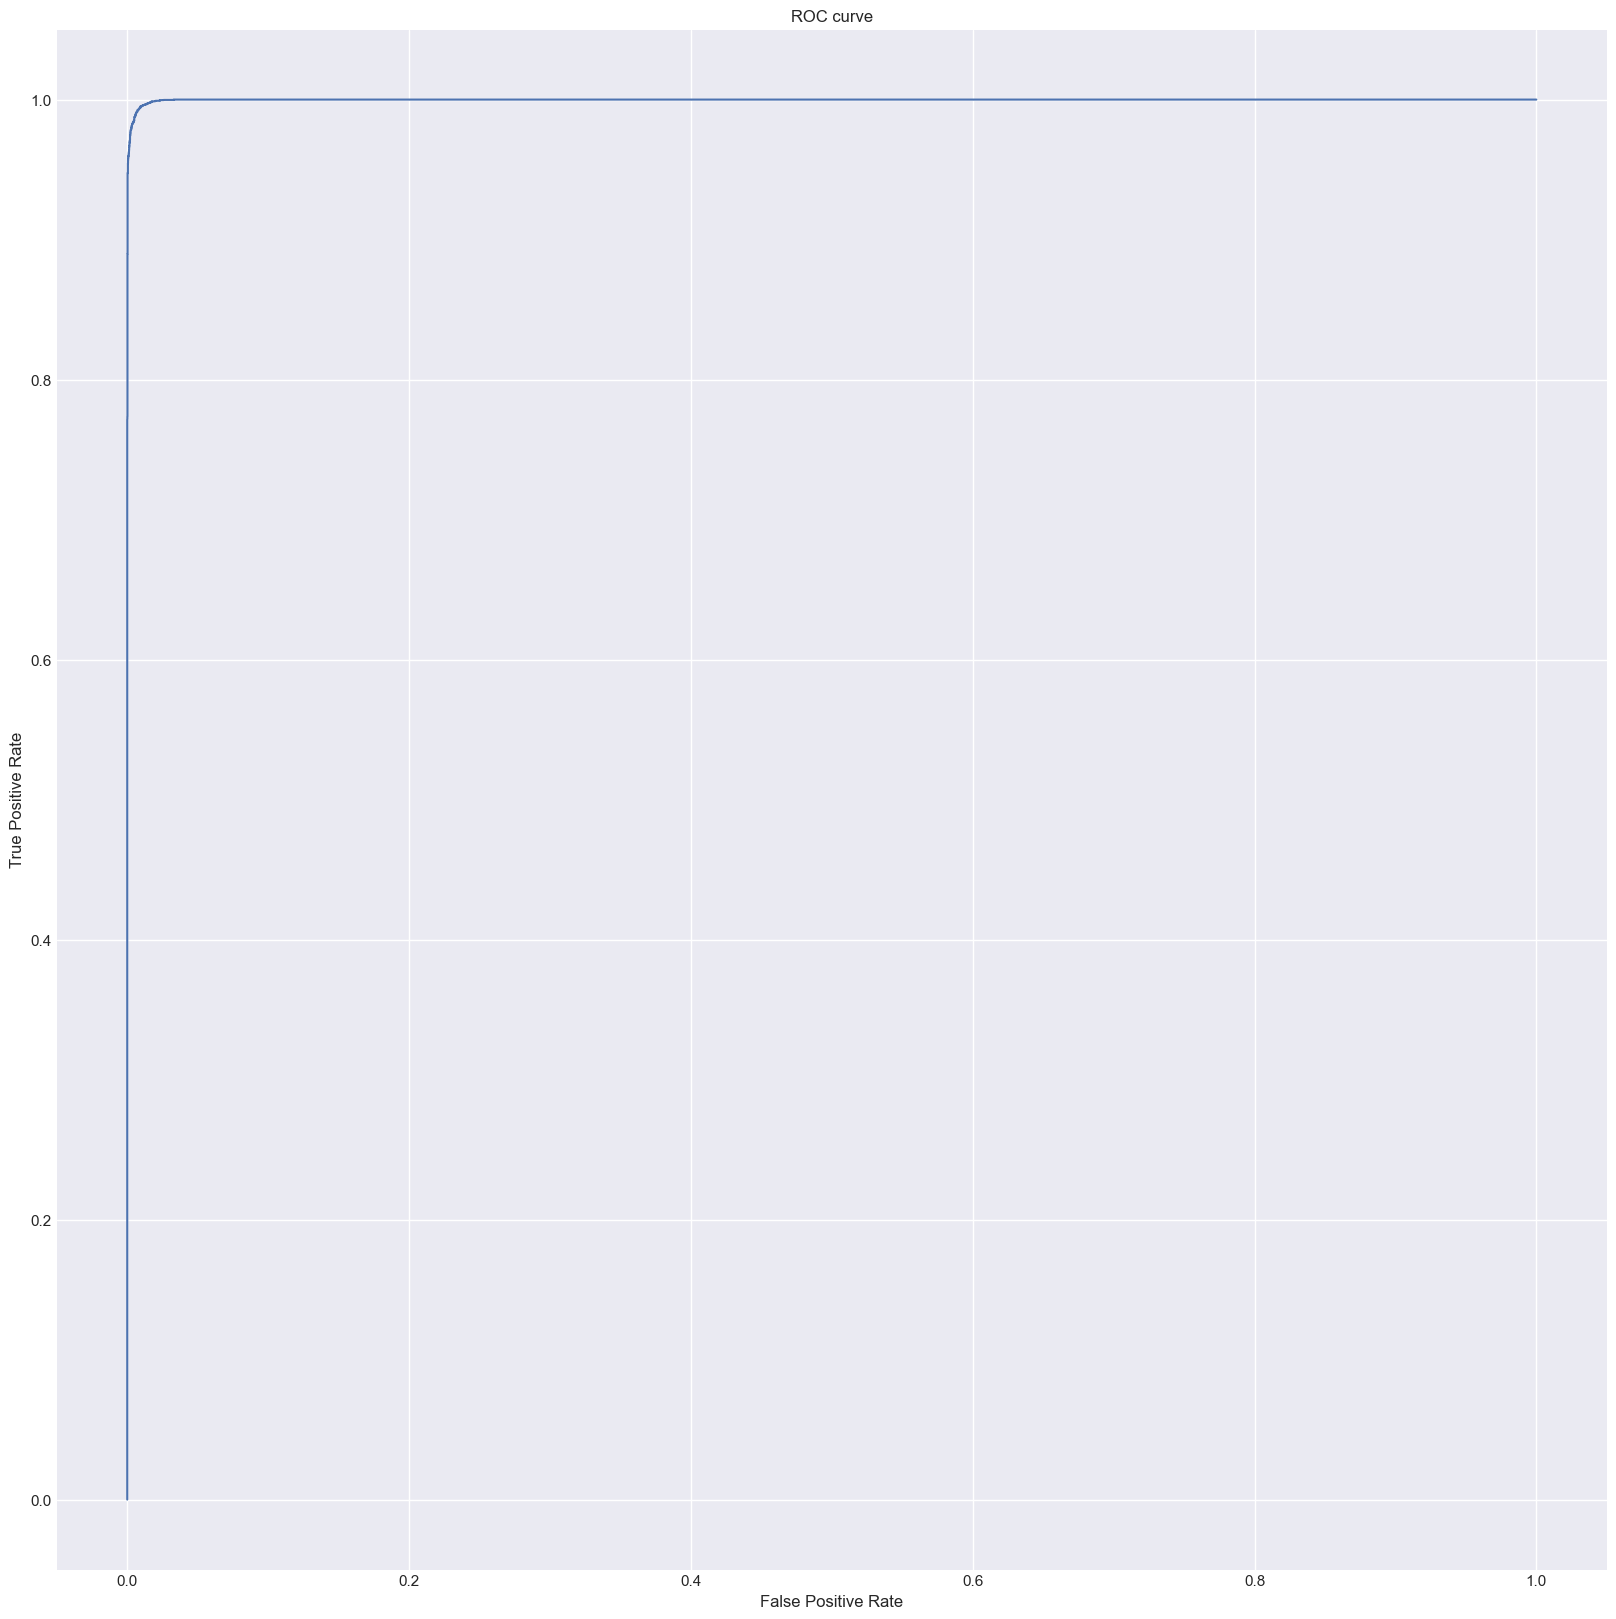

In [204]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(x_train, x_test, y_train, y_test)    
y_predicted = model(x_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

In [217]:
accuracy_scores

[97.53948382126349,
 96.72573189522342,
 96.4175654853621,
 83.71051617873651,
 99.01290535926819]

C:\Users\Pratham\AppData\Local\Temp\ipykernel_1732\3231045228.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


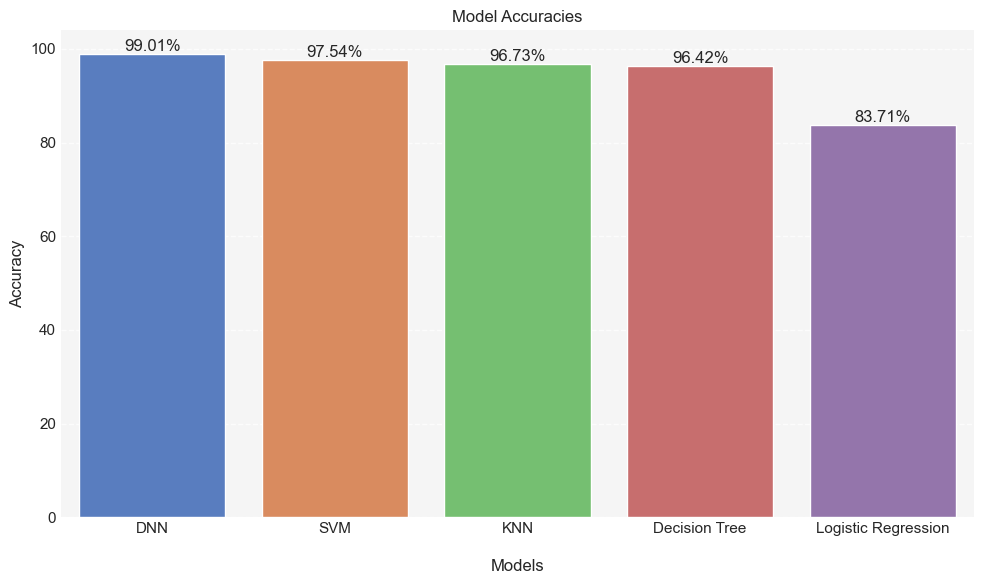

In [218]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'DNN']
model_names.reverse()
accuracy_scores.sort(reverse = True)
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))

sns.barplot(x=model_names, y=accuracy_scores, palette="muted", hue=model_names)

plt.legend(loc='upper right')

for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title("Model Accuracies")
plt.xlabel("\nModels")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()